In [101]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

In [12]:
raw_orders = pd.read_csv('../data/Orders.csv')
raw_returns = pd.read_csv('../data/Returns.csv')

In [13]:
print(raw_orders.shape)
print(raw_returns.shape)

(51290, 24)
(1079, 3)


In [14]:
pd.options.display.max_columns = None

In [15]:
raw_orders.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,Country,Region,Market,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,Australia,Oceania,Asia Pacific,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,Germany,Western Europe,Europe,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,Senegal,Western Africa,Africa,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [16]:
raw_orders.dtypes

Row.ID              int64
Order.ID           object
Order.Date         object
Ship.Date          object
Ship.Mode          object
Customer.ID        object
Customer.Name      object
Segment            object
Postal.Code       float64
City               object
State              object
Country            object
Region             object
Market             object
Product.ID         object
Category           object
Sub.Category       object
Product.Name       object
Sales              object
Quantity            int64
Discount          float64
Profit             object
Shipping.Cost     float64
Order.Priority     object
dtype: object

In [56]:
orders = raw_orders.copy()

In [57]:
orders['Sales'] = pd.to_numeric(orders['Sales'].str.replace('[$|,]', ""))
orders['Profit'] = pd.to_numeric(orders['Profit'].str.replace('[$|,]', ""))

In [58]:
orders.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,Country,Region,Market,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,Australia,Oceania,Asia Pacific,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,Germany,Western Europe,Europe,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,Senegal,Western Africa,Africa,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical


In [59]:
orders['Order.Date'] = pd.to_datetime(orders['Order.Date'])

In [66]:
orders['Order.Month'] = pd.DatetimeIndex(orders['Order.Date']).month

In [67]:
orders.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,Country,Region,Market,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.Month
0,40098,CA-2014-AB10015140-41954,2014-11-11,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,11
1,26341,IN-2014-JR162107-41675,2014-02-05,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical,2
2,25330,IN-2014-CR127307-41929,2014-10-17,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,Australia,Oceania,Asia Pacific,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium,10
3,13524,ES-2014-KM1637548-41667,2014-01-28,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,Germany,Western Europe,Europe,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium,1
4,47221,SG-2014-RH9495111-41948,2014-11-05,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,Senegal,Western Africa,Africa,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical,11


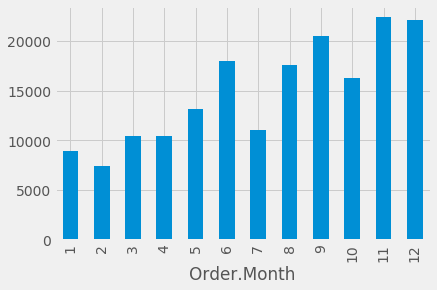

In [103]:
orders.groupby('Order.Month').sum()['Quantity'].plot.bar()

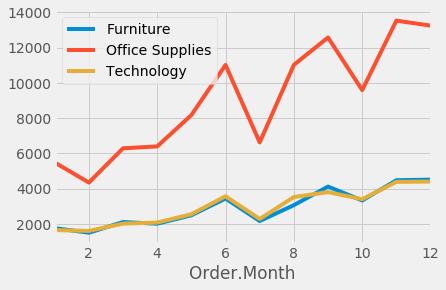

In [102]:
for cat, group in orders.groupby(['Category']):
    categories = group.groupby(['Order.Month'])['Quantity'].sum()
    categories.plot(y=orders['Quantity'], label=cat, legend=True)

In [90]:
raw_returns.head()

,Returned,Order ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania


In [188]:
returns = raw_returns.copy()

In [189]:
returns.rename(columns={"Order ID": "Order.ID"}, inplace = True)

In [190]:
orders_returns = pd.merge(orders, returns[['Order.ID','Returned']], how = "left", on = "Order.ID", )

In [191]:
orders_returns['Returned'].fillna('No', inplace = True)
orders_returns['Returned'].replace('Yes', 1, inplace = True)
orders_returns['Returned'].replace('No', 0, inplace = True)

In [133]:
orders_returns['Returned']

0        No
1        No
2        No
3        No
4        No
         ..
51285    No
51286    No
51287    No
51288    No
51289    No
Name: Returned, Length: 51290, dtype: object

In [134]:
orders_returns.loc[orders_returns['Returned'] == "Yes"]['Profit'].sum()

61370.75

In [137]:
orders_returns['Order.Year'] = pd.DatetimeIndex(orders['Order.Date']).year



In [141]:
orders_returns.loc[orders_returns['Returned']=='Yes'].groupby('Order.Year')['Profit'].sum()

Order.Year
2012    17477.26
2013     9269.89
2014    17510.63
2015    17112.97
Name: Profit, dtype: float64

In [207]:
temp = orders_returns.loc[orders_returns['Returned']==1].groupby('Customer.ID')[['Customer.ID']].count()

In [208]:
len(temp[temp['Customer.ID']>1])

547

In [210]:
len(temp[temp['Customer.ID']>5])

46

In [209]:
temp2 = orders_returns.groupby('Region').agg({'Returned':'sum', 'Order.ID':'count'})
temp2['Proportion'] = temp2['Returned']/temp2['Order.ID']*100
temp2.sort_values('Proportion', ascending = False)

,Returned,Order.ID,Proportion
Region,,,
Western US,177,3203,5.526069
Eastern Asia,131,2374,5.518113
Southern Europe,112,2113,5.300521
Southern Africa,25,478,5.230126
Southern US,83,1620,5.123457
Eastern US,134,2848,4.705056
Southeastern Asia,140,3129,4.474273
South America,133,2988,4.451138
Western Asia,108,2440,4.426230


In [205]:
temp3 = orders_returns.groupby(['Category','Sub.Category']).agg({'Returned':'sum', 'Order.ID':'count'})
temp3['Proportion'] = temp3['Returned']/temp3['Order.ID']*100
temp3.sort_values(['Category','Proportion'], ascending = False)

Returned  Order.ID  Proportion
Category        Sub.Category                                
Technology      Accessories        138      3075    4.487805
                Copiers             99      2223    4.453441
                Phones             145      3357    4.319333
                Machines            63      1486    4.239569
Office Supplies Labels             137      2601    5.267205
                Art                217      4864    4.461349
                Binders            269      6146    4.376830
                Paper              150      3492    4.295533
                Supplies           103      2407    4.279186
                Storage            212      5049    4.198851
                Envelopes           99      2387    4.147465
                Fasteners          102      2601    3.921569
                Appliances          59      1742    3.386912
Furniture       Tables              41       861    4.761905
                Bookcases          104      2411    4.313563
                Chairs             147      3434    4.280722
                Furnishings        135      3154    4.280279

In [206]:
temp4 = orders_returns.groupby(['Category']).agg({'Returned':'sum', 'Order.ID':'count'})
temp4['Proportion'] = temp4['Returned']/temp4['Order.ID']*100
temp4.sort_values(['Category','Proportion'], ascending = False)

,Returned,Order.ID,Proportion
Category,,,
Technology,445,10141,4.388127
Office Supplies,1348,31289,4.308223
Furniture,427,9860,4.330629


In [258]:
df = orders_returns.copy()

In [259]:
df['Returned'].replace(1, "Yes", inplace = True)
df['Returned'].replace(0, "No", inplace = True)

In [260]:
df.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,Country,Region,Market,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.Month,Order.Year,Returned
0,40098,CA-2014-AB10015140-41954,2014-11-11,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,2014,2014,No
1,26341,IN-2014-JR162107-41675,2014-02-05,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical,2014,2014,No
2,25330,IN-2014-CR127307-41929,2014-10-17,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,Australia,Oceania,Asia Pacific,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium,2014,2014,No
3,13524,ES-2014-KM1637548-41667,2014-01-28,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,Germany,Western Europe,Europe,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium,2014,2014,No
4,47221,SG-2014-RH9495111-41948,2014-11-05,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,Senegal,Western Africa,Africa,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical,2014,2014,No


In [261]:
df['Ship.Date'] = pd.to_datetime(df['Ship.Date'])

In [262]:
df['Process.Time'] = (df['Ship.Date']-df['Order.Date']).dt.days

In [263]:
df['Process.Time']

0        2
1        2
2        1
3        2
4        1
        ..
51285    0
51286    4
51287    5
51288    4
51289    4
Name: Process.Time, Length: 51290, dtype: int64

In [264]:
returned_products = df.loc[df['Returned']=='Yes'].groupby('Product.ID').count()[['Returned']].reset_index()
returned_products

,Product.ID,Returned
0,FUR-BO-3176,1
1,FUR-BO-3615,1
2,FUR-BO-3616,1
3,FUR-BO-3621,1
4,FUR-BO-3624,2
...,...,...
1489,TEC-PH-6348,1
1490,TEC-PH-6364,1
1491,TEC-PH-6365,1
1492,TEC-PH-6413,1


In [268]:
df = pd.merge(df, returned_products, on = "Product.ID", how = "left").rename(columns = {"Returned_y": "Returned.Count"}).fillna(0)

In [269]:
df.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,Country,Region,Market,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.Month,Order.Year,Returned_x,Process.Time,Returned.Count,Returned
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,2014,2014,No,2,0,0.0
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,0,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical,2014,2014,No,2,2,2.0
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,0,Brisbane,Queensland,Australia,Oceania,Asia Pacific,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium,2014,2014,No,1,2,2.0
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,0,Berlin,Berlin,Germany,Western Europe,Europe,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium,2014,2014,No,2,0,0.0
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,0,Dakar,Dakar,Senegal,Western Africa,Africa,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical,2014,2014,No,1,0,0.0


In [270]:
df.loc[:, df.columns != ['Row.ID', 'Order.ID', 'Customer.ID', 'Customer.Name', 'Product.ID', 'Product.Name']]

ValueError: Arrays were different lengths: 30 vs 6